Introduction of Pytorch 


In [1]:
"Pytorch Workflow"
 # Getting setup 


'Pytorch Workflow'

What this  notebook consist
1. data (Prepare and load)
2. build Model
3. Fitting the model  to data (training) 
4. Making prediction and evaluating a model
5. saving and loading a model 
6. Putting it all together



In [2]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt 
# check Pytorch versio
torch.__version__

'2.9.0+cpu'

1. Data Preparing and loading 
Data can be almost anything 
* Excel speadsheet
* Image
* Video
* Audio 
* DNA
* Text

2 Machine Learning is a game of two parts:
* Get Data into a numberical representation 
* Build a model to learn patterns in that numerical representation 
Same  gose for Deep Learning 

To show case this let's create some known data using Linear Regression 


In [3]:
# Create ' Known ' parameters
from param import random_seed


weight=0.7
bias=0.3
# Create  data 
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y= weight* X+bias 
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(Y)

(50, 50)

Spliting data into training and test sets

Training sets  -> The model learns from this data ->60-80% -> Always 
Validation sets -> The model  gets tuned on this data -> 10-20% -> often but not always 
Testing set-> The model gets evaluated on this data to test  what it has learned ->10-20%


In [5]:
train_split=int(0.8*len(X))
x_train,y_train=X[:train_split],Y[:train_split]
x_test,y_test=X[train_split:],Y[train_split:]
len(x_train),len(x_test),len(y_test),len(y_train)

(40, 10, 10, 40)

Visualize

In [6]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

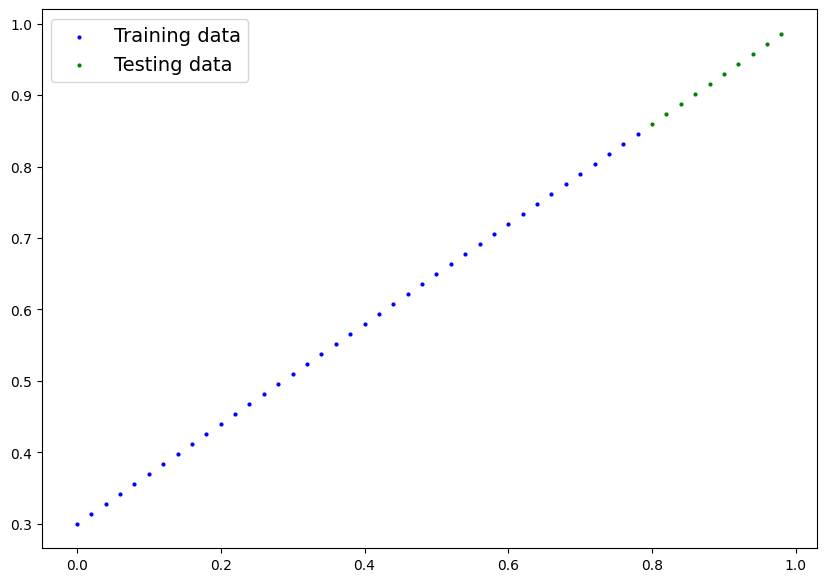

In [7]:
plot_predictions();

Build Model 


In [8]:
from importlib.metadata import requires


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,dtype=torch.float32),requires_grad=True)
        self.bias=nn.Parameter(torch.rand(1,dtype=torch.float32),requires_grad=True)
    def forward(self,X:torch.tensor)->torch.Tensor:
        return self.weights*X+self.bias

torch.nn	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

Checking the Model speed 

In [9]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(52)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.7162], requires_grad=True),
 Parameter containing:
 tensor([0.7838], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7162])), ('bias', tensor([0.7838]))])

Making Predictions Using 

In [11]:
with torch.inference_mode():
    Y_preds=model_0(x_test)

You probably noticed we used torch.inference_mode() as a context manager

In [12]:
print(f"Number of testing Sample:{len(x_train)}")
print(f"Number of Predictions made:{len(Y_preds)}")
print(f"Predicted values:\n{Y_preds}")

Number of testing Sample:40
Number of Predictions made:10
Predicted values:
tensor([[1.3568],
        [1.3711],
        [1.3854],
        [1.3998],
        [1.4141],
        [1.4284],
        [1.4427],
        [1.4571],
        [1.4714],
        [1.4857]])


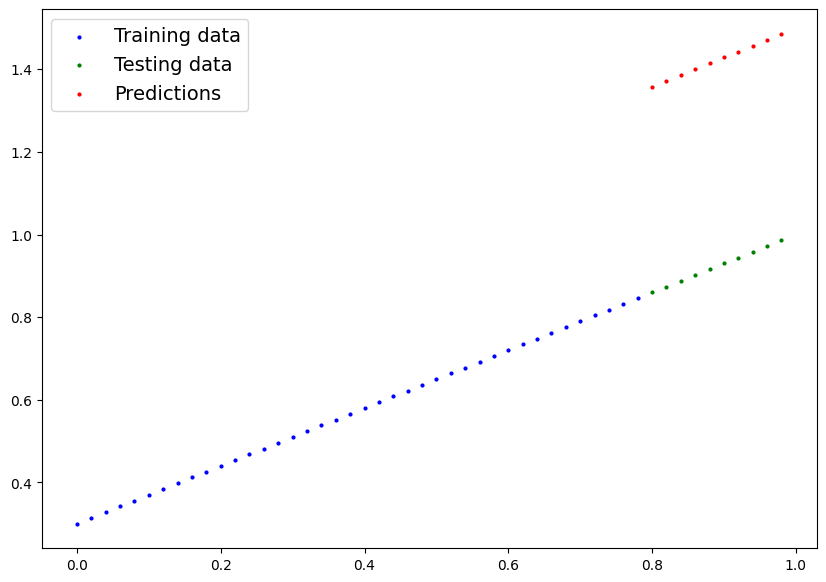

In [13]:
plot_predictions(predictions=Y_preds)

Predictions with Plot 

In [14]:
y_test-Y_preds

tensor([[-0.4968],
        [-0.4971],
        [-0.4974],
        [-0.4978],
        [-0.4981],
        [-0.4984],
        [-0.4987],
        [-0.4991],
        [-0.4994],
        [-0.4997]])

Train Model 

In [15]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [17]:
# Creating the optimizer 
import param


loss_fn=nn.L1Loss()
#  Creating the Optimizer 
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [30]:
# Training the model 
torch.manual_seed(42)
epochs=100
train_loss_values=[]
test_loss_values=[]
epoch_count=[]


for epoch in range(epochs):
    model_0.train()
    y_pred=model_0(x_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
# Testing the Model
    model_0.eval()
    with torch.inference_mode():
        test_pred=model_0(x_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        if epoch %10 ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")






Epoch: 0 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 10 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 20 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 30 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 40 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 50 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 60 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 70 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 80 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 
Epoch: 90 | MAE Train Loss: 0.0054834745824337006 | MAE Test Loss: 0.009346204809844494 


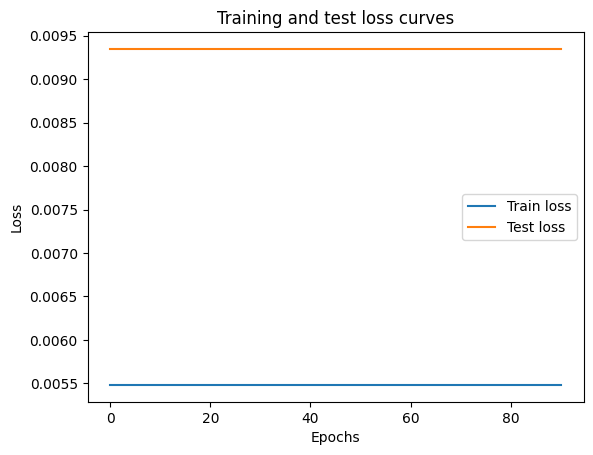

In [29]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();